# Data exploration

### Introduction

The first step of any analysis is to understand what we are searching for. In our analysis we aim to measure the central exclusive di-lepton production, $pp\to p\oplus \ell\ell \oplus p$ process with $\ell\in\{ e,\mu \} $. Feinman diagram of this process are shown bellow: 

<img src="img/diagrams.png" alt="Feinmann diagrams" style="width: 700px;"/>

Where in our case, we will consider only electrons and muons. 

---
The measurement using 2016 data was published in [JHEP07(2018)153](https://arxiv.org/abs/1803.04496). 

---

To understand the process better, we will explore the final state signature. We will use [uproot4](https://github.com/scikit-hep/uproot4) to read ROOT file, and [numpy](https://numpy.org/) arrays to analyze the data


In [1]:
#start with standard python imports
#!pip install --user mplhep uproot4 #enable this line if the imports fails
import numpy as np
import uproot
import matplotlib.pyplot as plt
import mplhep as hep
from matplotlib.colors import LogNorm

#print(hep.__version__)

In [2]:
#to make the plots in CMS style execute this line
plt.style.use([hep.style.ROOT, hep.style.firamath])
plt.style.use(hep.style.CMS)

In [3]:
#Execute this line if running on SWAN, otherwise update the path to the data files:
PATH='/eos/cms/store/user/jjhollar/CERNSummerStudentProject2021/'
#PATH='data'
filename=PATH+'/gammagammaMuMu_FPMC_pT25_PU140_NTUPLE_1_version3.root'

## Loading the data (signal)

We will load MC file of the simulated signal events. For more info how to read ROOT files, see [this](UpROOT4_example.ipynb) notebook



In [4]:
tree = uproot.open(filename+":myana/mytree")

Browse the names of the branches:

In [5]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
evt_size             | int32_t                  | AsDtype('>i4')
vtx_size             | int32_t                  | AsDtype('>i4')
vtx_x                | float[]                  | AsJagged(AsDtype('>f4'))
vtx_y                | float[]                  | AsJagged(AsDtype('>f4'))
vtx_z                | float[]                  | AsJagged(AsDtype('>f4'))
vtx_pt2              | float[]                  | AsJagged(AsDtype('>f4'))
vtx4D_size           | int32_t                  | AsDtype('>i4')
vtx4D_x              | float[]                  | AsJagged(AsDtype('>f4'))
vtx4D_y              | float[]                  | AsJagged(AsDtype('>f4'))
vtx4D_z              | float[]                  | AsJagged(AsDtype('>f4'))
vtx4D_t              | float[]                  | AsJagged(AsDtype('>f4'))
vtx4D_terr           | float[]             

### Making plots

In the next cell we will plot the number of protons stored for each event:

In [6]:
# read array of protons
proton_size = tree['genproton_size'].array(library="pd")
# signal
proton_xi = tree['genproton_xi'].array(library ="pd")
# pileup
proton_ispu = tree['genproton_ispu'].array(library ="pd")

[Text(1, 59.0, 'Relative momentum loss Δ P/P'),
 Text(58.5, 1, 'number of entries')]

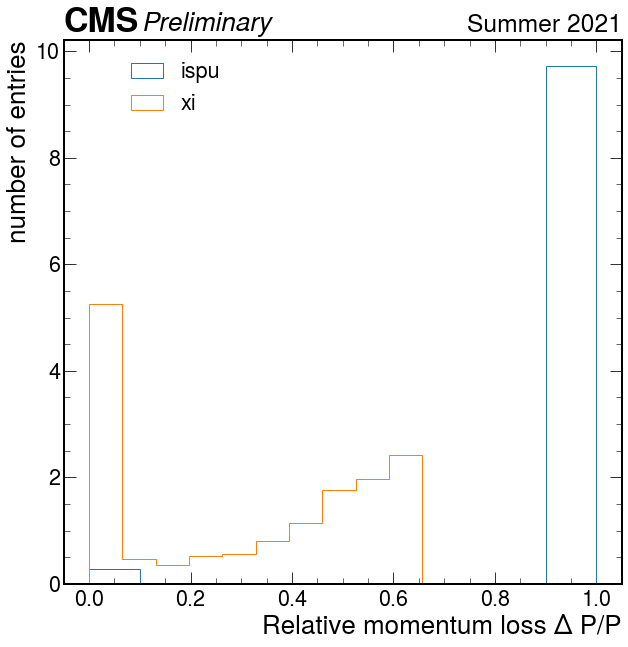

In [7]:
# plot a histogram of proton multiplicity
f, ax = plt.subplots()
plt.hist(proton_ispu, histtype='step', density = True)
plt.hist(proton_xi, histtype='step', density = True)

#create legend
labels= ['ispu','xi']
#add different labels to the plot and save to a file
hep.cms.label(llabel="Preliminary", rlabel="Summer 2021", ax=ax)
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.2, 1.0)); 

ax.set(xlabel='Relative momentum loss \u0394 P/P', ylabel='number of entries')
#plt.savefig('ProtonPlots/ispu_xi_combined.png')
    

In [8]:
#convert the array to histogram with defined number of bins
bins = np.linspace(0,1,150)
data=np.histogram(proton_xi, bins, density=True)

protons = tree.arrays(['genproton_xi','genproton_ispu'],library="pd")
protons.head()

protonspz = tree.arrays(['genproton_pz','genproton_ispu'],library="pd")
protonspz.head()



genproton_pz  genproton_ispu
entry subentry                              
0     0          6982.961914               0
      1         -6918.951172               0
      2          6982.961914               1
      3         -6918.951172               1
      4         -7000.000000               1

In [9]:
h_signal = protons[protons.genproton_ispu==0]['genproton_xi'].values
h_background = protons[protons.genproton_ispu==1]['genproton_xi'].values

bins = np.linspace(0,1,150)

[ 2.4340029e-03  1.1578380e-02 -4.3039623e-08 ...  3.3848712e-01
  2.6041776e-04  5.8010262e-01]


[Text(1, 59.0, 'relative momentum loss Δ P/P'),
 Text(58.5, 1, 'number of entries')]

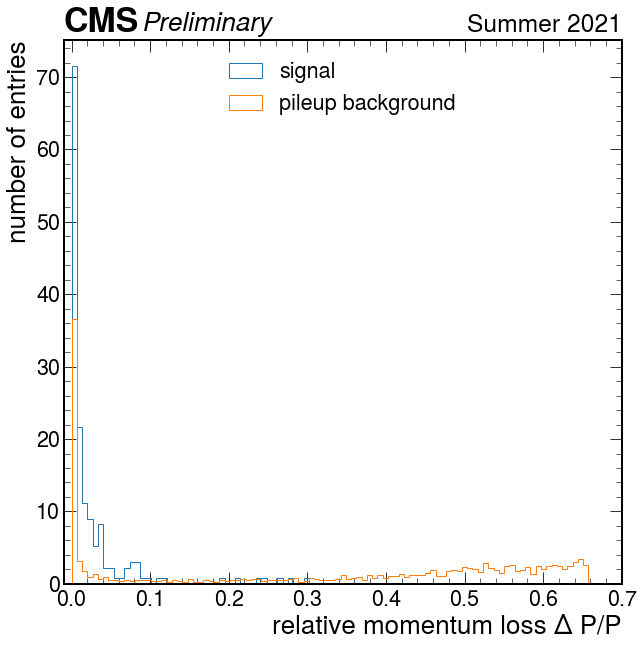

In [10]:
f, ax = plt.subplots()
print(h_background)
plt.hist(h_signal,bins,histtype='step',density=True)
plt.hist(h_background,bins,histtype='step', density=True)
plt.xlim(-0.01,0.7)
#create legend
labels= ['signal', 'pileup background']
#add different labels to the plot and save to a file
hep.cms.label(llabel="Preliminary", rlabel="Summer 2021", ax=ax)
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, 1.0)); 

ax.set(xlabel='relative momentum loss \u0394 P/P', ylabel='number of entries')
#plt.savefig('ProtonPlots/protons_combined.png')

[Text(1, 59.0, 'GeV/c²'), Text(28.5, 1, 'number of entries')]

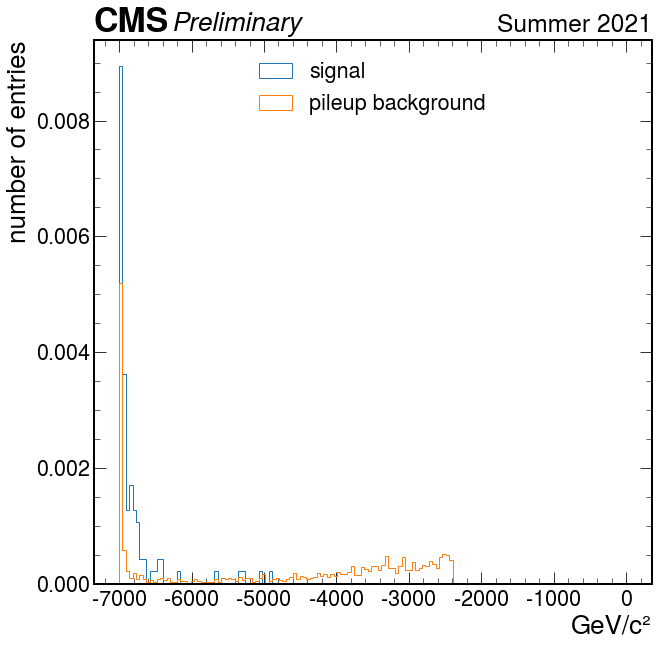

In [11]:
#getprotons_pz to find their longitudinal momentum. Proton momentum loss is defined by: genprotons_xi = abs(initial_pz - final_pz) / initial_pz = dp/p 
genprotons_pz = tree['genproton_pz'].array(library ="pd")
#genprotons_xi = (1.0 - np.abs(genprotons_pz)/7000.0) 
bins = np.linspace(-7000,0,150)

#to combine signa and pileup
h_sig = protonspz[protonspz.genproton_ispu==0]['genproton_pz'].values
h_bg = protonspz[protonspz.genproton_ispu==1]['genproton_pz'].values

f, ax = plt.subplots()
plt.hist(h_sig,bins,histtype='step',density=True)
plt.hist(h_bg,bins,histtype='step',density=True)
#plt.xlim(2000,7500)
#create legend
labels= ['signal', 'pileup background']
#add different labels to the plot and save to a file
hep.cms.label(llabel="Preliminary", rlabel="Summer 2021", ax=ax)
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, 1.0)); 

ax.set(xlabel='GeV/c²', ylabel='number of entries')
#plt.savefig('ProtonPlots/protonpz_combined_left.png')
    

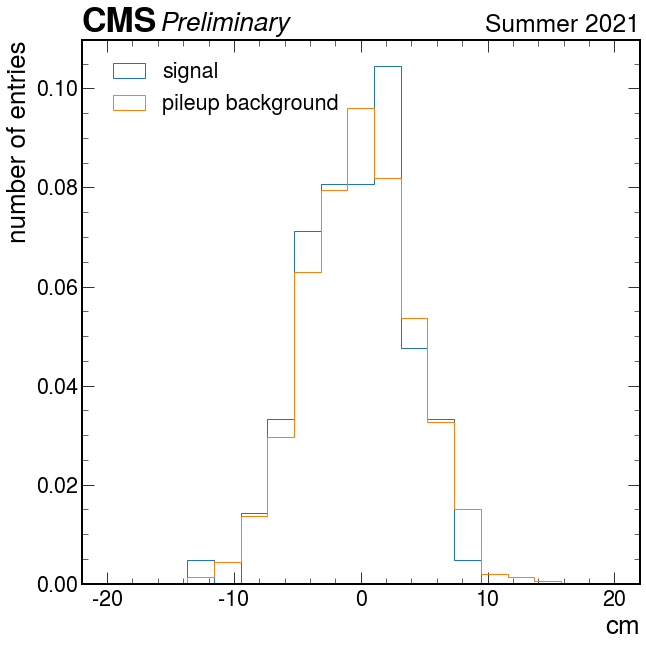

In [12]:
protonsvz = tree.arrays(['genproton_vz', 'genproton_ispu'], library = "pd")
protonsvz.head()
#genprotons_vz = tree['genproton_vz'].array(library ="pd")
bins = np.linspace(-20,20,20)

#to combine signa and pileup
h_s = protonsvz[protonsvz.genproton_ispu==0]['genproton_vz'].values
h_b = protonsvz[protonsvz.genproton_ispu==1]['genproton_vz'].values
#print(h_s)
f, ax = plt.subplots()
plt.hist(h_s,bins,histtype='step',density=True)
plt.hist(h_b,bins,histtype='step',density=True)
#plt.xlim(0,50)
#create legend
labels= ['signal', 'pileup background']
#add different labels to the plot and save to a file
hep.cms.label(llabel="Preliminary", rlabel="Summer 2021", ax=ax)
ax.legend(labels,loc='upper right', bbox_to_anchor=(0.5, 1.0)); 

ax.set(xlabel='cm', ylabel='number of entries')
plt.savefig('ProtonPlots/protonvz_combined.png')

[Text(1, 59.0, 'cm'), Text(40.5, 1, 'number of entries')]

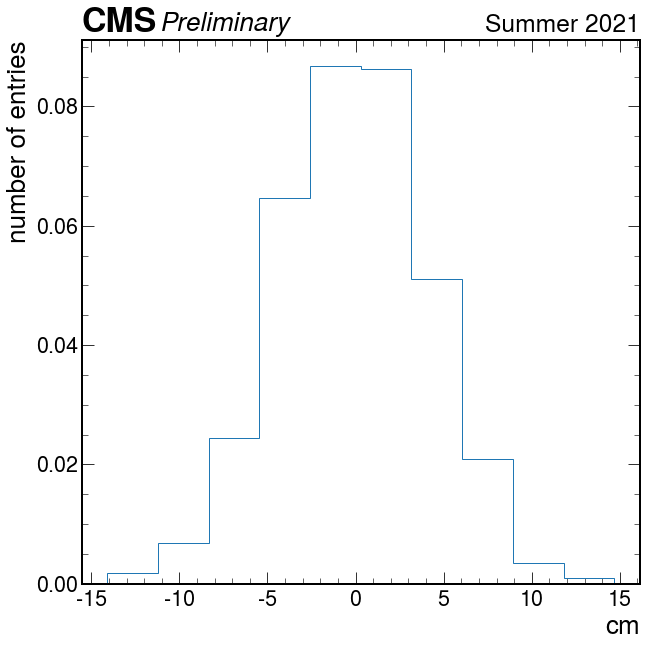

In [13]:
genprotons_vz = tree['genproton_vz'].array(library = "pd")

f, ax = plt.subplots()

plt.hist(genprotons_vz, histtype='step',density = True)
#create legend 'Proton momentum loss ',
#labels= ['vertex position protons']
#add different labels to the plot and save to a file
hep.cms.label(llabel="Preliminary", rlabel="Summer 2021", ax=ax)
#ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, 1.0)); 
#I think it is x and y, but I am not sure
ax.set(xlabel='cm', ylabel='number of entries')
#plt.savefig('ProtonPlots/vertex.png')

[Text(1, 59.0, 'GeV/c²'), Text(4.5, 1, 'number of entries')]

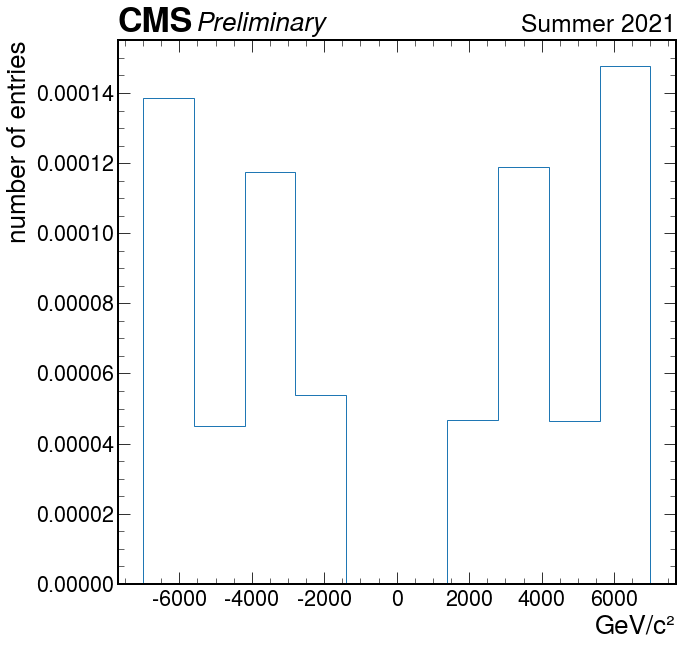

In [14]:
f, ax = plt.subplots()

plt.hist(genprotons_pz, histtype='step',density = True)
#create legend 'Proton momentum loss ',
#labels= ['longitudinal momentum']
#add different labels to the plot and save to a file
hep.cms.label(llabel="Preliminary", rlabel="Summer 2021", ax=ax)
#ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, 1.0)); 
ax.set(xlabel='GeV/c²', ylabel='number of entries')
#plt.savefig('ProtonPlots/pz.png')

In [15]:
#Read all particle-flow candidates into a pandas dataframe:
PFcand= tree.arrays(['pfcand_pt','pfcand_eta','pfcand_phi','pfcand_t','pfcand_vz','pfcand_pid'],library="pd")

#extract muons from the dataframe:
muons = PFcand[(PFcand.pfcand_pid==-13) | (PFcand.pfcand_pid==13)]

#remove the column 'pid':
muons.drop(['pfcand_pid'],axis=1)


pfcand_pt  pfcand_eta  pfcand_phi   pfcand_t  pfcand_vz
entry subentry                                                         
0     9          0.916016    2.303171    1.585489  -0.177298  -3.075564
      314        0.752441   -2.004517   -2.872068   0.264371   1.327233
      1152       0.937012   -1.830744   -1.910419 -99.000000  -0.581282
      1622      30.968750   -0.153264    2.224775   0.221819   1.829606
      1623      30.687500   -1.407758   -0.913602 -99.000000   1.829591
...                   ...         ...         ...        ...        ...
99    1274      26.437500    1.319315   -1.465767   0.065198  -4.267654
      1275      26.421875   -1.523850    1.653273 -99.000000  -4.267082
      1421       0.990723   -1.758415   -2.225273   0.174146  -5.475675
      1841       1.202148    1.739921    0.067491   0.170206  -7.130873
      1845       1.196289    1.869198   -1.510601  -0.014184   5.125563

[1405 rows x 5 columns]

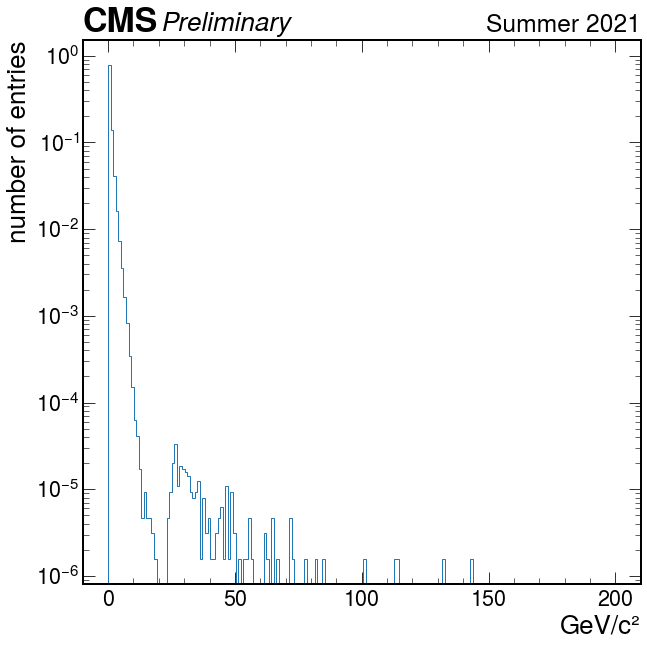

In [16]:
mu_pt = tree['pfcand_pt'].array(library = "pd")

f, ax = plt.subplots()
bins = np.linspace(0,200,200)
plt.hist(mu_pt,bins,histtype='step',density = True)
#plt.xlim(-0.1,10)
#create legend 'Proton momentum loss ',
#labels= ['\u03BC transverse momentum']
#add different labels to the plot and save to a file
hep.cms.label(llabel="Preliminary", rlabel="Summer 2021", ax=ax)
#ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, 1.0)); 
ax.set(xlabel='GeV/c²', ylabel='number of entries')
plt.yscale('log')
plt.savefig('Mu/pt_full_log.png')

[Text(1, 59.0, 'η'), Text(40.5, 1, 'number of entries')]

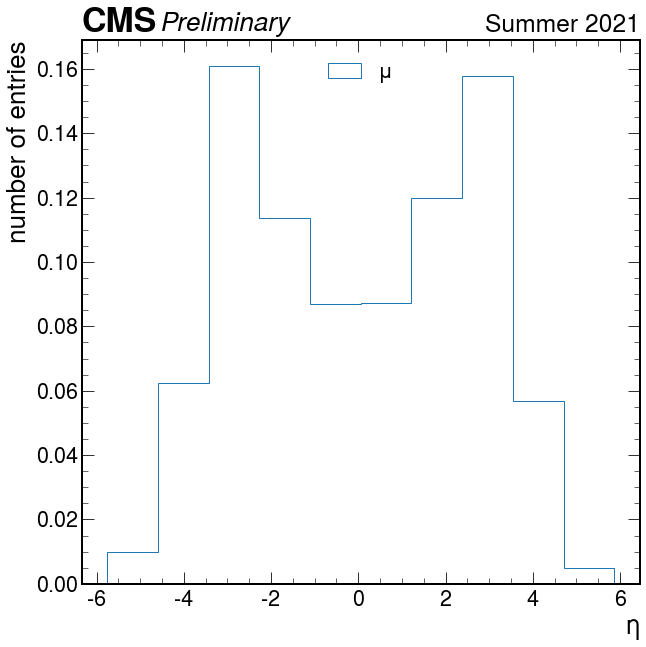

In [17]:
mu_eta = tree['pfcand_eta'].array(library = "pd")

f, ax = plt.subplots()

plt.hist(mu_eta, histtype='step',density = True)
#plt.xlim(0,25)
#create legend 'Proton momentum loss ',
labels= ['\u03BC']
#add different labels to the plot and save to a file
hep.cms.label(llabel="Preliminary", rlabel="Summer 2021", ax=ax)
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, 1.0)); 
ax.set(xlabel='\u03B7', ylabel='number of entries')
#plt.savefig('Mu/eta.png')

[Text(1, 59.0, 'rad'), Text(40.5, 1, 'number of entries')]

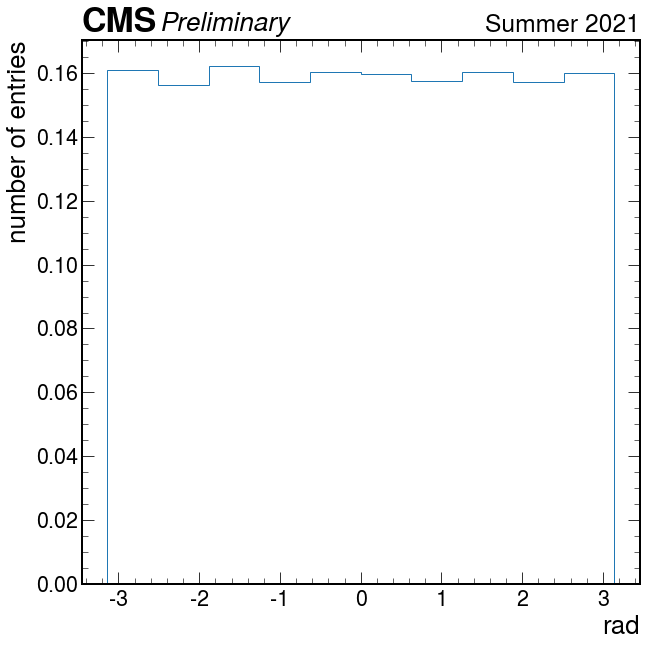

In [18]:
mu_phi = tree['pfcand_phi'].array(library = "pd")

f, ax = plt.subplots()

plt.hist(mu_phi, histtype='step',density = True)
#create legend
#labels= ['\u03BC']
#add different labels to the plot and save to a file
hep.cms.label(llabel="Preliminary", rlabel="Summer 2021", ax=ax)
#ax.legend(labels,loc='center'); 
ax.set(xlabel='rad', ylabel='number of entries')
#plt.savefig('Mu/phi.png')

[Text(1, 59.0, 'ns'), Text(52.5, 1, 'number of entries')]

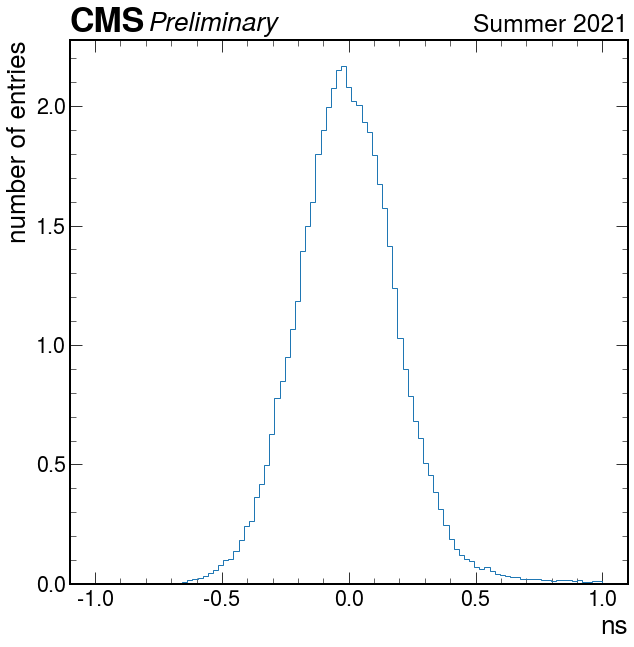

In [19]:
mu_t = tree['pfcand_t'].array(library = "pd")

f, ax = plt.subplots()
bins = np.linspace(-1,1,100)
plt.hist(mu_t,bins, histtype='step',density = True)
#plt.xlim(-0.1,1.2)
#create legend
#labels= ['\u03BC']
#add different labels to the plot and save to a file
hep.cms.label(llabel="Preliminary", rlabel="Summer 2021", ax=ax)
#ax.legend(labels,loc='center'); 
ax.set(xlabel='ns', ylabel='number of entries')
#plt.savefig('Mu/t_full_scan.png')

[Text(1, 59.0, 'cm'), Text(40.5, 1, 'number of entries')]

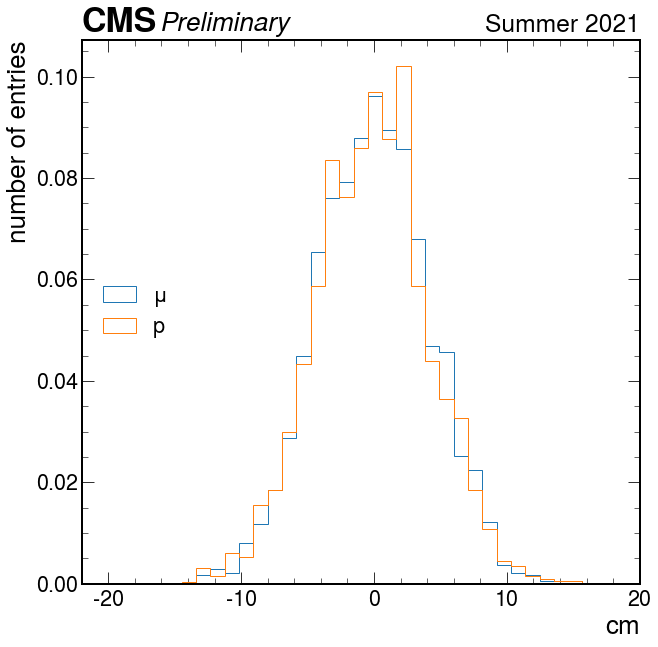

In [21]:
mu_vz = tree['pfcand_vz'].array(library = "pd")
p_vz = tree['genproton_vz'].array(library = "pd")
f, ax = plt.subplots()
bins = np.linspace(-22,20,40)
plt.hist(p_vz, bins, histtype = 'step', density = True)
plt.hist(mu_vz, bins, histtype='step',density = True)
plt.xlim(-22,20)
#create legend
labels= ['\u03BC', 'p']
#add different labels to the plot and save to a file
hep.cms.label(llabel="Preliminary", rlabel="Summer 2021", ax=ax)
ax.legend(labels,loc='center left'); 
ax.set(xlabel='cm', ylabel='number of entries')
#plt.savefig('Mu/mu_prot_vz.png')

[Text(1, 59.0, 'GeV/c²'), Text(34.5, 1, 'number of entries')]

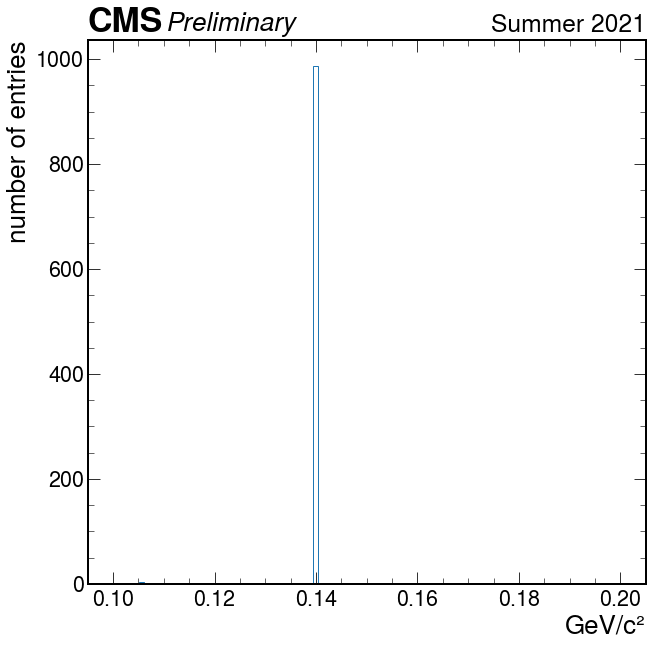

In [22]:
mu_mass = tree['pfcand_mass'].array(library = "pd")

f, ax = plt.subplots()
bins = np.linspace(0.1,0.2,100)
plt.hist(mu_mass, bins,histtype='step',density = True)
#plt.xlim(0.075,0.2)
#create legend
#labels= ['\u03BC']
#add different labels to the plot and save to a file
hep.cms.label(llabel="Preliminary", rlabel="Summer 2021", ax=ax)
#ax.legend(labels,loc='center'); 
ax.set(xlabel='GeV/c²', ylabel='number of entries')
#plt.savefig('Mu/mass_scan_2.png')

In [23]:
#2D correlation plots!
#reconstructed muon time vs. the true collision time (genvtx_t0 variable)
#and the reconstructed muon vz vs. the genproton_vz for signal protons+muons.

0     0.227750
1     0.086690
2    -0.218516
3    -0.185044
4    -0.651508
        ...   
95   -0.189960
96    0.074293
97   -0.237789
98    0.158923
99    0.153091
Length: 100, dtype: float32


ValueError: operands could not be broadcast together with shapes (99,) (100,) 

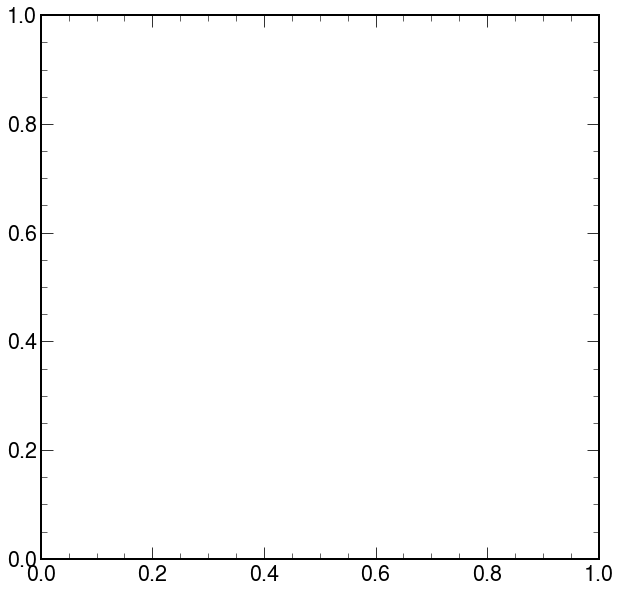

In [43]:
import scipy
import pandas as pd
import seaborn as sns
from scipy import signal
from scipy import misc
mu_t = tree['pfcand_t'].array(library = "pd")
true_t = tree['genvtx_t0'].array(library = "pd")
#print(true_t)
#print(mu_t)
#np.resize(mu_t,(3,4))
bins=np.linspace(-10,10,100)


data_mu=np.histogram(mu_t, bins,  density = True)
data_true=np.histogram(true_t, bins, density = True)
#print(mu_t)
print(true_t)
plt.hist2d(data_true, data_mu)

ValueError: ('Lengths must match to compare', (636941,), (200,))

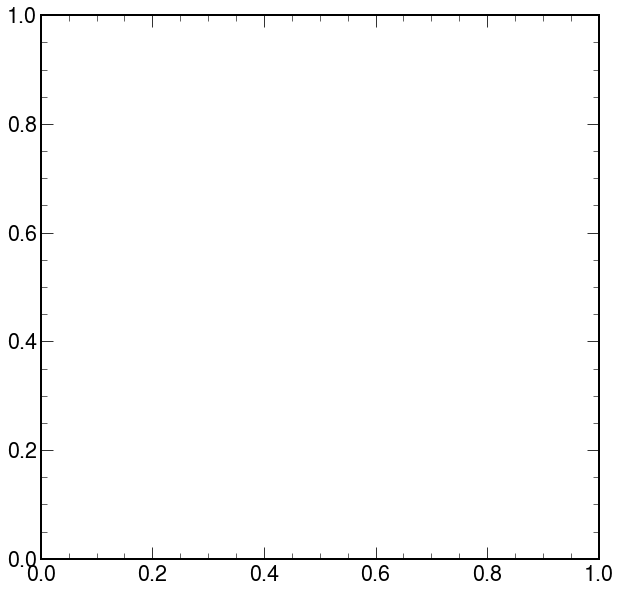

In [142]:
import scipy
import pandas as pd
import seaborn as sns
from scipy import signal
from scipy import misc
mu_vz = tree['pfcand_vz'].array(library = "pd")
protonsvz = tree.arrays(['genproton_vz', 'genproton_ispu'], library = "pd")
bins = np.linspace(-20,20,20)

#to combine signa and pileup
h_s = protonsvz[protonsvz.genproton_ispu==0]['genproton_vz'].values

bins=np.linspace(-10,10,100)


plt.hist2d(h_s, mu_vz)